In [ ]:
import numpy as np
label_neg = [1]*12500
label_pos = [0]*12500
label = np.array(label_pos + label_neg)
print(label)

[0 0 0 ... 1 1 1]


In [ ]:
weight_matrix = np.load('/content/drive/My Drive/weight_matrix.npy', allow_pickle=True)
x_train = np.load('/content/drive/My Drive/x_train.npy', allow_pickle=True)
print(x_train.shape)
print(weight_matrix.shape)

(50000, 500)
(124253, 50)


In [ ]:
x_train_pre = np.load('/content/drive/My Drive/x_train_pre.npy', allow_pickle=True)
input_trainpre = x_train_pre[:25000]
input_testpre = x_train_pre[25000:]

In [ ]:
input_train = x_train[:25000]
input_test = x_train[25000:]

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Activation, Flatten, Input
from keras.layers import SimpleRNN, LSTM

In [ ]:
def Vanilla_RNN(state):
  model = Sequential()
  model.add(
        Embedding(input_dim=len(weight_matrix), output_dim=50,
                  input_length=500, weights=[weight_matrix])
      )
  # model.add(
  #       Embedding(input_dim=len(weight_matrix), output_dim=50, input_length=500)
  #     )
  model.add(SimpleRNN(units=state))
  model.add(Dropout(0.1))
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(units=1, activation='sigmoid'))

  model.compile(
      loss='binary_crossentropy',
      optimizer='rmsprop',
      metrics=['accuracy']
  )
  return model

In [ ]:
def LSTM_model(state):
  model = Sequential()
  model.add(
      Embedding(input_dim=len(weight_matrix), output_dim=50, 
                input_length=500, weights=[weight_matrix])
  )
  model.add(LSTM(units=state))
  model.add(Dropout(0.1))
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(units=1, activation='sigmoid'))

  model.compile(
      loss='binary_crossentropy',
      optimizer='rmsprop',
      metrics=['accuracy']
  )
  return model

In [ ]:
# model = Vanilla_RNN(100)
model = LSTM_model(20)
model.fit(input_trainpre, label, batch_size=256, validation_split=0.1, epochs=10)

In [ ]:
model.history

In [ ]:
states = [20, 50, 100, 200, 500]
def runhyperParameters(states):
  score_rnn = []
  score_lstm = []
  histrnn = []
  histlstm = []
  for state in states:
    model_rnn = Vanilla_RNN(state)
    history_RNN = model_rnn.fit(input_trainpre, label, batch_size=256, validation_split=0.1, epochs=10)
    test_score_rnn = model_rnn.evaluate(input_testpre, label)
    score_rnn.append(test_score_rnn)
    histrnn.append(history_RNN)

    model_lstm = LSTM_model(state)
    history_lstm = model_lstm.fit(input_trainpre, label, batch_size=256, validation_split=0.1, epochs=10)
    test_score_lstm = model_lstm.evaluate(input_testpre, label)
    score_lstm.append(test_score_lstm)
    histlstm.append(history_lstm)

  return[histrnn, histlstm, score_rnn, score_lstm]

In [13]:
histrnn, histlstm, score_rnn, score_lstm = runhyperParameters(states)
np.save('/content/drive/My Drive/histrnn.npy',histrnn)
np.save('/content/drive/My Drive/histlstm.npy',histlstm)
np.save('/content/drive/My Drive/score_rnn.npy', score_rnn)
np.save('/content/drive/My Drive/score_lstm.npy', score_lstm)

Epoch 1/10
88/88 [==============================] - 23s 266ms/step - loss: 0.6702 - accuracy: 0.5887 - val_loss: 0.7539 - val_accuracy: 0.4880
Epoch 2/10
88/88 [==============================] - 23s 264ms/step - loss: 0.5770 - accuracy: 0.7030 - val_loss: 0.5317 - val_accuracy: 0.7540
Epoch 3/10
88/88 [==============================] - 23s 266ms/step - loss: 0.5225 - accuracy: 0.7508 - val_loss: 0.7989 - val_accuracy: 0.5416
Epoch 4/10
88/88 [==============================] - 23s 262ms/step - loss: 0.4829 - accuracy: 0.7787 - val_loss: 0.6705 - val_accuracy: 0.6692
Epoch 5/10
88/88 [==============================] - 23s 266ms/step - loss: 0.4751 - accuracy: 0.7821 - val_loss: 0.5786 - val_accuracy: 0.7096
Epoch 6/10
88/88 [==============================] - 23s 265ms/step - loss: 0.4314 - accuracy: 0.8132 - val_loss: 0.6196 - val_accuracy: 0.7152
Epoch 7/10
88/88 [==============================] - 23s 260ms/step - loss: 0.4036 - accuracy: 0.8287 - val_loss: 0.7551 - val_accuracy: 0.6032

TypeError: ignored

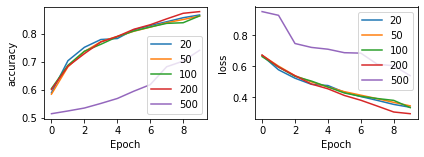

In [67]:
import matplotlib.pyplot as plt
plot_label={1:'accuracy', 2:'loss', 3:'val_accuracy'}
def plotHist(hist, score):
  fig = plt.figure(3)
  for index in range(1, 3):
    plt.subplot(2, 2, index)
    plt.xlabel("Epoch")
    plt.ylabel(plot_label[index])
    for state_index, state_val in enumerate(states):
      plt.plot(hist[state_index].epoch,hist[state_index].history[plot_label[index]], label=state_val)
      plt.legend()
  fig.tight_layout()
plotHist(histrnn)
plt.show()

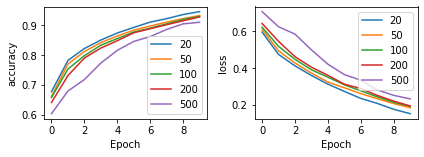

In [68]:
plotHist(histlstm)
plt.show()

In [80]:
rnn_accuracy = [ s[1] for s in score_rnn]
lstm_accuracy = [s[1] for s in score_lstm]
rnn_loss = [ s[0] for s in score_rnn]
lstm_loss = [s[0] for s in score_lstm]

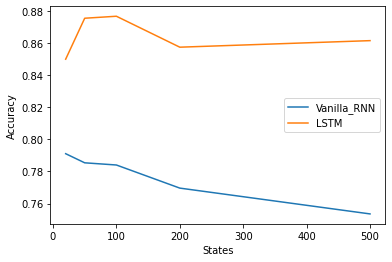

In [83]:
plt.plot(states, rnn_accuracy, label='Vanilla_RNN')
plt.legend(loc='center right')
plt.plot(states, lstm_accuracy, label='LSTM')
plt.legend(loc='center right')
plt.xlabel("States")
plt.ylabel("Accuracy")
plt.show()

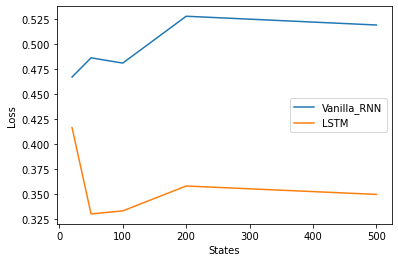

In [84]:
plt.plot(states, rnn_loss, label='Vanilla_RNN')
plt.legend(loc='center right')
plt.plot(states, lstm_loss, label='LSTM')
plt.legend(loc='center right')
plt.xlabel("States")
plt.ylabel("Loss")
plt.show()